# COMP47670 Assignment 1
## NBA: Evolution of Shot Selection in the NBA

### Conor McFeely
### Student No: 19204085

In [1]:
from selenium.webdriver.firefox.options import Options
from selenium import webdriver
from bs4 import BeautifulSoup 
import pandas as pd
from pandas import read_csv
import requests
import time
import csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Selection of Appropriate API

 I have a massive interest in all things basketball related, I have been playing basketball competitively must of my life 
 and I work for the governing body in Ireland, Basketball Ireland. Hence why I wanted to complete this project on Basketball depending on the availablility of an API for basketball.

 National Basketball Association (NBA) provide API's so I chose to use these. The style of the NBA has evolved the last few years with many players expected to shoot 34% and above from the three point line. 
 
 This API collects the team shooting information by seasons played. I will be collecting the information from the past 10 seasons
 https://stats.nba.com/teams/shooting/?Season=2019-20&SeasonType=Regular%20Season

## Task 2: Collect data your chosen API(s)

Collecting Raw Data:

Using geckodriver for firefox I was able to collect the information I needed for the NBA seasons. A for loop function was created to select the years I wanted to iterate through.

Using Beautifoul soup i was able to parse the NBA API and find the correct information. A list was created for the information to be saved and a loop to gather all information in a row. The process is repeated a futher 9 more times to collect all the information for the specific seasons.

In [2]:
def fetchData1():
    options = Options() # To make browser headless 
    options.headless = True # set that to true 
    driver = webdriver.Firefox(executable_path="geckodriver", options=options) # link path to the geckodriver

    years = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20'] # years to loop over
    for year in years: # start iteration process
        driver.get(f"https://stats.nba.com/teams/shooting/?Season={year}&SeasonType=Regular%20Season") # navigate to target url / add looped year to url
        time.sleep(2)

        bs = BeautifulSoup(driver.page_source, "lxml") # set encoding of page to lxml
        table_body=bs.find('tbody')

        data_found = [] # 
        data_rows = table_body.find_all('tr') # find the table rows tag
        for row in data_rows: # for loop to begin running through 
            cols = row.find_all('td') # find all table data in table rows 
            cols = [x.text.strip() for x in cols] # strip all text from the rows 

            data_found.append(cols) # append that data to the empty list 
        
        dfObj = pd.DataFrame(data_found) # convert list to dataframe 
        dfObj[0:30].to_csv(f"{year}.csv", encoding='utf-8', index=False) # convert pandas dataframe to csv / add csv name as iterated years
 

fetchData1()

## 3. Parse the collected data, and store it in an appropriate file format

Parsing Raw Data:

The raw csv files saved from the API need to be cleaned slightly and saved into a better format for further cleaning and manupulation. The first loop will call on each saved down csv, remove the last 3 columns that had null information, the header column will be updated with the correct headers for each column. Next a season column is added after the first which will show what season the information is from.

The next set of code is to read all the updated csv files and combine them into one data frame with no header. Once that is completed the dataframe is printed to check its what I need it to be and then it's sent to a CSV file called combined and a message just to let the user know that the data has been combined into a CSV.

In [3]:
files = ['2010-11.csv', '2011-12.csv', '2012-13.csv', '2013-14.csv', '2014-15.csv', '2015-16.csv', '2016-17.csv', '2017-18.csv', '2018-19.csv', '2019-20.csv']

for file in files:
	df = read_csv(file)
	df = df.iloc[:, :-3]
	df.columns = ['Team', 'FGM < 5FT', 'FGA < 5FT', 'FG% < 5FT', 'FGM 5-9FT', 'FGA 5-9FT', 'FG% 5-9FT', 'FGM 10-14FT', 'FGA 10-14FT', 'FG% 10-14FT', 'FGM 15-19FT', 'FGA 15-19FT', 'FG% 15-19FT', 'FGM 20-24FT', 'FGA 20-24FT', 'FG% 20-24FT', 'FGM 25-29FT', 'FGA 25-29FT', 'FG% 25-29FT']
	df.insert(1, 'Season', file.split('.')[0])
	df.to_csv(file, index=False)

In [4]:
allfiles = ['2010-11.csv', '2011-12.csv', '2012-13.csv', '2013-14.csv', '2014-15.csv', '2015-16.csv', '2016-17.csv', '2017-18.csv', '2018-19.csv', '2019-20.csv']

li = []

for filename in allfiles:
    dfcom = pd.read_csv(filename, header=0)
    li.append(dfcom)

frame = pd.concat(li, axis=0)
frame = frame.drop(frame.columns[0], axis=1)
frame

,Season,FGM < 5FT,FGA < 5FT,FG% < 5FT,FGM 5-9FT,FGA 5-9FT,FG% 5-9FT,FGM 10-14FT,FGA 10-14FT,FG% 10-14FT,FGM 15-19FT,FGA 15-19FT,FG% 15-19FT,FGM 20-24FT,FGA 20-24FT,FG% 20-24FT,FGM 25-29FT,FGA 25-29FT,FG% 25-29FT
0,2010-11,13.8,22.8,60.6,4.0,9.1,43.4,2.2,5.8,37.8,7.3,16.4,44.4,6.5,16.5,39.2,2.5,7.5,33.5
1,2010-11,17.4,27.8,62.5,2.6,6.5,39.7,3.0,6.7,44.7,6.9,16.2,42.9,5.5,13.6,40.5,1.4,4.8,29.8
2,2010-11,17.3,30.6,56.5,2.5,6.6,37.9,2.1,5.6,38.4,6.4,15.8,40.6,4.1,10.6,38.9,2.6,8.2,31.7
3,2010-11,17.9,30.2,59.1,2.4,6.3,38.1,2.2,5.8,38.9,6.3,15.5,40.8,5.7,15.0,37.8,2.6,7.1,36.9
4,2010-11,16.1,28.1,57.2,3.7,10.4,35.7,2.0,6.1,32.3,5.1,12.9,39.4,5.4,14.7,36.5,2.9,8.5,34.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2019-20,17.5,28.5,61.6,4.1,10.0,41.1,2.7,6.7,39.7,2.7,5.8,46.4,5.5,15.2,36.4,7.7,21.1,36.4
26,2019-20,15.4,24.7,62.3,4.5,9.9,45.4,4.9,10.9,44.7,5.3,12.0,44.6,5.5,13.7,40.3,6.4,18.0,35.8
27,2019-20,20.6,34.8,59.3,2.6,6.7,38.4,1.5,4.2,36.5,1.4,4.0,35.7,5.6,14.5,38.6,8.6,23.5,36.5
28,2019-20,17.8,28.3,62.8,4.4,10.7,41.2,2.7,6.3,42.8,1.6,3.7,43.9,6.8,16.6,40.6,6.8,18.2,37.2


In [5]:
frame.to_csv('combined.csv', index=None)
print("Raw data collected and combined into CSV")

Raw data collected and combined into CSV


## 4. Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

The combined dataframe still consists of a lot of information and because of this I'm going to parse the data into specific files, grouping by the season.

Once the files have been grouped, I have decided to split them into two point shots, three point shots and the overall shooting percentage. This will make it easier to visualise the information in graphs to help identify some key areas.

All columns in each data frame are checked to insure that there is no null columns and once that's complete we are safe to move onto the next step.

In [6]:
LeagueFile = pd.read_csv("combined.csv")

twoPointShots = LeagueFile.groupby(['Season'])['FGM < 5FT', 'FGA < 5FT', 'FGM 5-9FT', 'FGA 5-9FT', 'FGM 10-14FT', 'FGA 10-14FT', 'FGM 15-19FT', 'FGA 15-19FT', 'FGM 20-24FT', 'FGA 20-24FT'].mean()
twoPointShots.head(3)

,FGM < 5FT,FGA < 5FT,FGM 5-9FT,FGA 5-9FT,FGM 10-14FT,FGA 10-14FT,FGM 15-19FT,FGA 15-19FT,FGM 20-24FT,FGA 20-24FT
Season,,,,,,,,,,
2010-11,16.710000,27.866667,3.513333,9.006667,2.653333,6.770000,6.000000,14.570000,5.733333,14.876667
2011-12,16.720000,28.553333,3.283333,8.543333,2.630000,6.853333,5.703333,14.320000,5.473333,14.793333
2012-13,17.053333,29.110000,3.246667,8.353333,2.590000,6.646667,5.416667,13.456667,5.583333,14.743333


In [7]:
threePointShots = LeagueFile.groupby(['Season'])['FGM 25-29FT', 'FGA 25-29FT'].mean()
threePointShots.head(2)

,FGM 25-29FT,FGA 25-29FT
Season,,
2010-11,2.613333,7.690000
2011-12,2.650000,7.966667


In [8]:
shotPercentage = LeagueFile.groupby(['Season'])['FG% < 5FT', 'FG% 5-9FT', 'FG% 10-14FT', 'FG% 15-19FT', 'FG% 20-24FT', 'FG% 25-29FT'].mean()
shotPercentage.head(3)

,FG% < 5FT,FG% 5-9FT,FG% 10-14FT,FG% 15-19FT,FG% 20-24FT,FG% 25-29FT
Season,,,,,,
2010-11,60.033333,38.843333,39.013333,41.150000,38.416667,33.833333
2011-12,58.550000,38.260000,38.020000,39.616667,36.953333,33.026667
2012-13,58.623333,38.613333,38.730000,40.190000,37.723333,34.550000


In [46]:
TotalFG = LeagueFile.groupby(['Season'])['FGM < 5FT', 'FGM 5-9FT', 'FGM 10-14FT', 'FGM 15-19FT', 'FGM 20-24FT'].mean()
TotalFG['Total 2 point FG'] = TotalFG.sum(axis=1)
TotalFG.drop(TotalFG.columns[[0, 1, 2, 3, 4,]], axis = 1, inplace = True) 
DataJoined = TotalFG.join(threePointShots)
DataJoined.drop(DataJoined.columns[[2]], axis = 1, inplace = True) 
DataJoined

,Total 2 point FG,FGM 25-29FT
Season,,
2010-11,34.610000,2.613333
2011-12,33.810000,2.650000
2012-13,33.890000,3.226667
2013-14,34.143333,3.533333
2014-15,33.886667,3.600000
2015-16,34.610000,3.583333
2016-17,34.423333,4.536667
2017-18,33.270000,6.273333
2018-19,34.120000,6.843333


In [9]:
twoPointShots.isnull().sum()

FGM < 5FT      0
FGA < 5FT      0
FGM 5-9FT      0
FGA 5-9FT      0
FGM 10-14FT    0
FGA 10-14FT    0
FGM 15-19FT    0
FGA 15-19FT    0
FGM 20-24FT    0
FGA 20-24FT    0
dtype: int64

In [10]:
shotPercentage.isnull().sum()

FG% < 5FT      0
FG% 5-9FT      0
FG% 10-14FT    0
FG% 15-19FT    0
FG% 20-24FT    0
FG% 25-29FT    0
dtype: int64

In [11]:
threePointShots.isnull().sum()

FGM 25-29FT    0
FGA 25-29FT    0
dtype: int64

In [47]:
DataJoined.isnull().sum()

Total 2 point FG    0
FGM 25-29FT         0
dtype: int64

### 5. Analyse and summarise the cleaned dataset

Now I will analyse the cleaned data frames to try and identify some trends in the NBA shooting and have an idea if the NBA has changed in the past 10 years using different visula graphs to read the data much more coherently.

<Figure size 720x288 with 0 Axes>

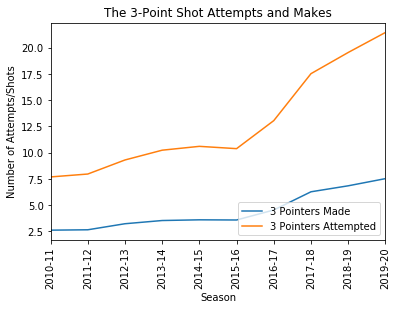

In [12]:
plt.figure(figsize=(10,4))
threePointShots.plot()
plt.title("The 3-Point Shot Attempts and Makes")
plt.xlabel("Season")
plt.ylabel("Number of Attempts/Shots")
plt.xticks(rotation=90)
plt.legend(('3 Pointers Made','3 Pointers Attempted'), loc=4)
plt.show()

Text(0, 0.5, 'Shot Percentage')

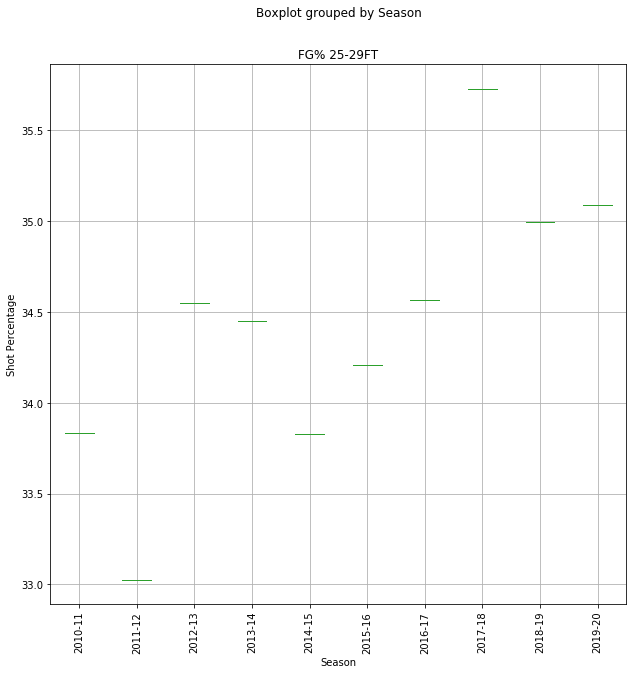

In [13]:
shotPercentage.boxplot(column=['FG% 25-29FT'],by='Season',figsize=(10,10),rot=90)
plt.ylabel("Shot Percentage")

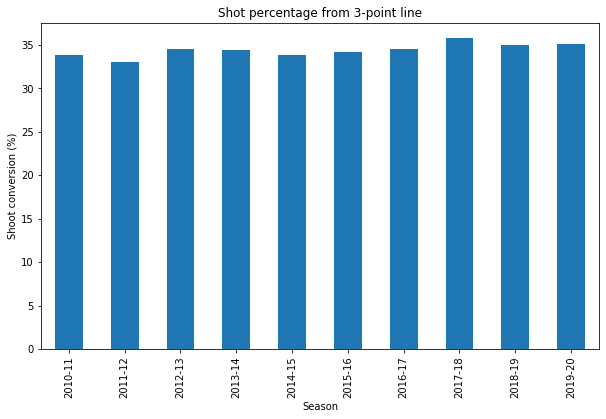

In [14]:
plt.figure(figsize=(10,6))
threepointpercentage = shotPercentage.groupby("Season")['FG% 25-29FT'].mean()
plt.title("Shot percentage from 3-point line")
plt.ylabel("Shoot conversion (%)")
plt.xlabel("Season")
threepointpercentage.plot.bar()

<Figure size 720x7200 with 0 Axes>

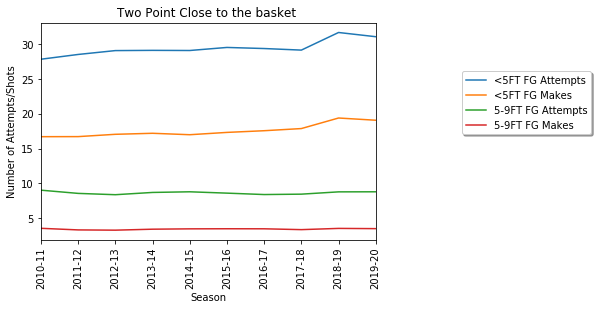

In [15]:
plt.figure(figsize=(10,100))
twoPointShotsClose = twoPointShots.groupby("Season")['FGA < 5FT','FGM < 5FT', 'FGA 5-9FT', 'FGM 5-9FT'].mean()
twoPointShotsClose.plot()
plt.title("Two Point Close to the basket ")
plt.xlabel("Season")
plt.ylabel("Number of Attempts/Shots")
plt.xticks(rotation=90)
plt.legend(('<5FT FG Attempts','<5FT FG Makes', '5-9FT FG Attempts', '5-9FT FG Makes'), loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

<Figure size 7200x7200 with 0 Axes>

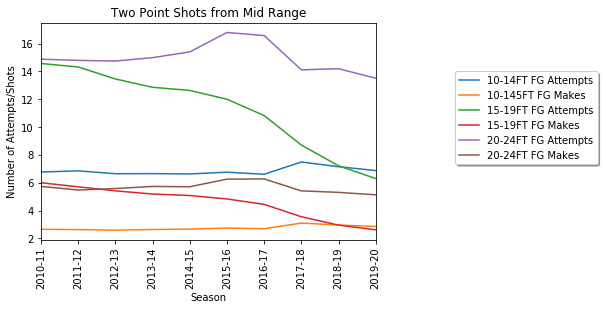

In [16]:
plt.figure(figsize=(100,100))
twoPointShotsMid = twoPointShots.groupby("Season")['FGA 10-14FT','FGM 10-14FT', 'FGA 15-19FT', 'FGM 15-19FT', 'FGA 20-24FT', 'FGM 20-24FT'].mean()
twoPointShotsMid.plot()
plt.title("Two Point Shots from Mid Range")
plt.xlabel("Season")
plt.ylabel("Number of Attempts/Shots")
plt.xticks(rotation=90)
plt.legend(('10-14FT FG Attempts', '10-145FT FG Makes', '15-19FT FG Attempts', '15-19FT FG Makes', '20-24FT FG Attempts', '20-24FT FG Makes'), loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

Text(0.5, 0, 'Season')

<Figure size 7200x7200 with 0 Axes>

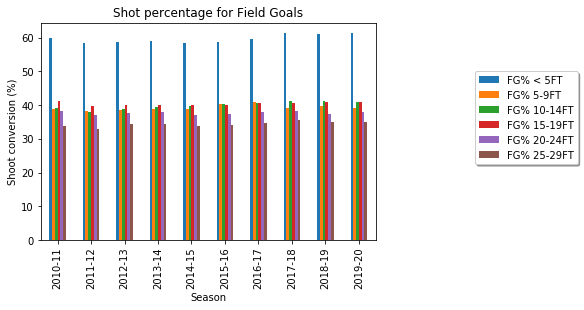

In [17]:
plt.figure(figsize=(100,100))
twopointpercentage = shotPercentage.groupby("Season")['FG% < 5FT','FG% 5-9FT','FG% 10-14FT', 'FG% 15-19FT', 'FG% 20-24FT', 'FG% 25-29FT'].mean()
twopointpercentage.plot.bar()
plt.title("Shot percentage for Field Goals")
plt.ylabel("Shoot conversion (%)")
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel("Season")

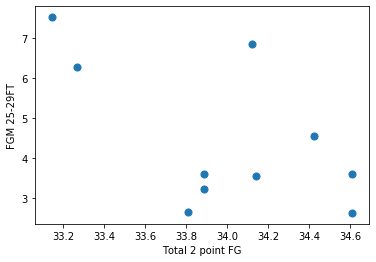

In [54]:
DataJoined.plot.scatter(x="Total 2 point FG", y="FGM 25-29FT", s=50 )

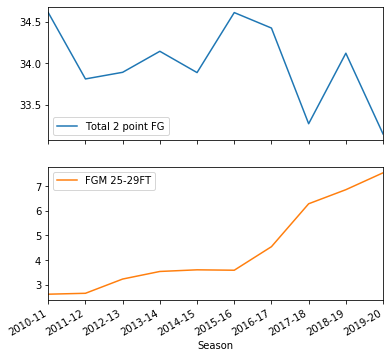

In [55]:
DataJoined.plot(subplots=True, figsize=(6, 6));

### Conclusion

Observations from the graph we can see that 3 point attempts (25-29 foot) have nearly doubled since 2015 and even before then there was a slight increase each year. Not only has the attempts doubled but the success rate of three point shots has doubled. The bar graph that illustrates the success of the three point makes (3 point percentage) shows that there has not been a decline in the shooting percentage despite the increase in shot attempts.

According to the graphs since the 2016 season there has been a decline in mid-range shots, in particular shots from 15-19 feet and 20-24 feet. This may be due to the increase in three point shots so teams are working towards that which takes away shot oppurtunites from other areas of the floor.

The shot percentage (FG%) has remained similar throughout the decase, but in the past five seasons there has been an increase in shot percentage for close to the basket <5 and 5-9 feet. This will be due to the correlation of increased three point shots which causes the floor to be more spaced as players have to be guarded 25 feet from the basket therefore more room closer to the basket.

The last graph shows that there is a true increase in the total 3 point shots being made in the NBA and it does look to be a trend in the past 5 Seasons. The 2 point FG look to stay around the same numbers never changing by more than two up or down.